In [12]:
import copy

# Import libraries and modules
import numpy as np
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import tarfile
import urllib

import warnings
warnings.filterwarnings('ignore')

import pickle

In [13]:
# Dataset directory
dataset_master_dir = "D:\\KIGAM_Hackathon\\Dataset\\3w_dataset-master\\data\\data.7z\\data"
os.chdir(dataset_master_dir)

dir_list = os.listdir(dataset_master_dir) # ['0', '1', '2', '3', '4', '5', '6', '7', '8']

def load_data(filename: str):
    csv_path = filename
    date_parser_ = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.000000")
    return pd.read_csv(csv_path, sep=",", parse_dates=['timestamp'], date_parser=date_parser_)

testdata = load_data("D:\\KIGAM_Hackathon\\Dataset\\3w_dataset-master\\data\\data.7z\\data\\1\\DRAWN_00001.csv")
print(testdata)

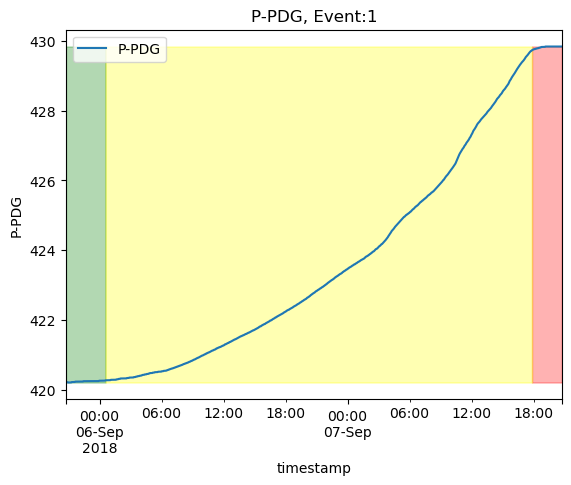

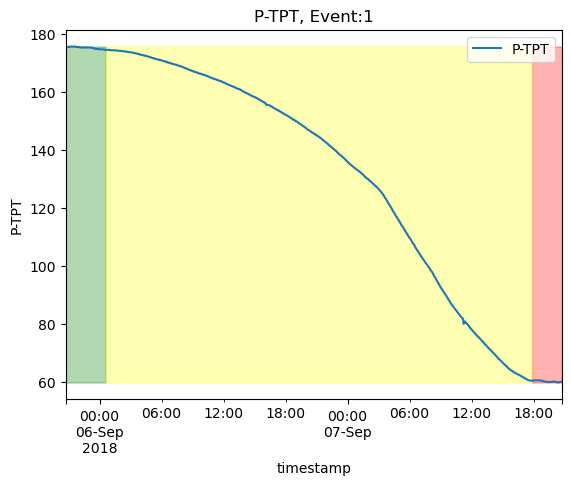

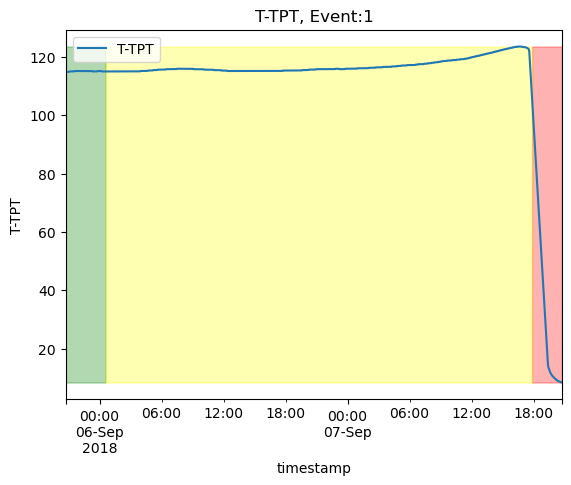

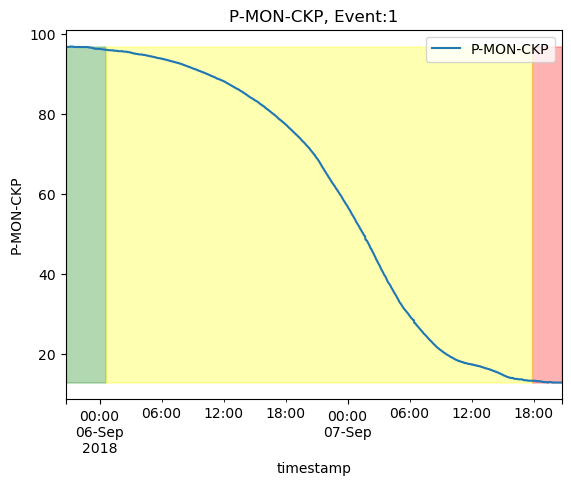

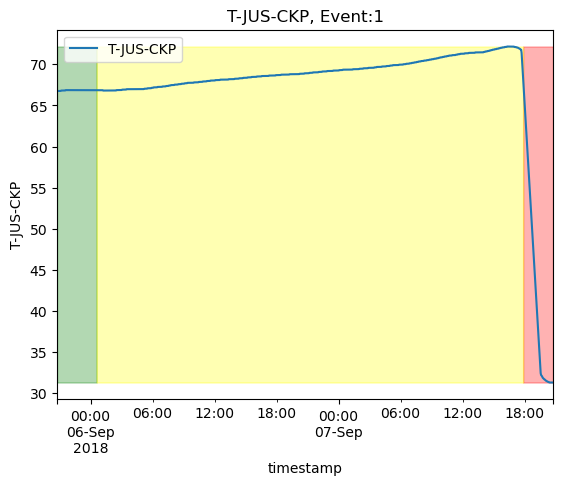

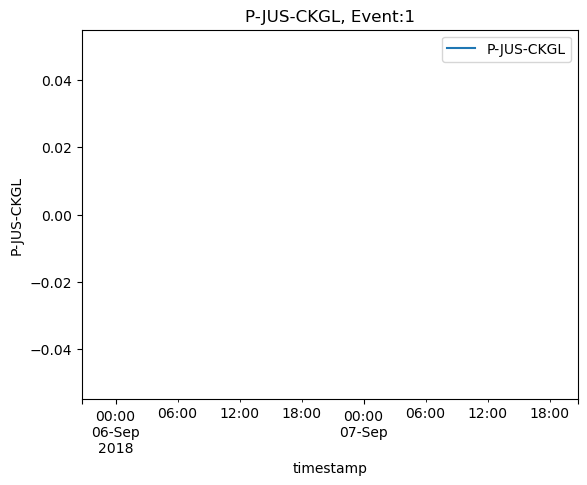

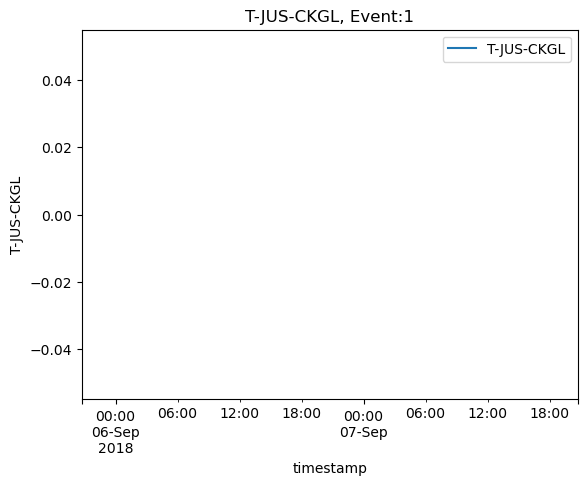

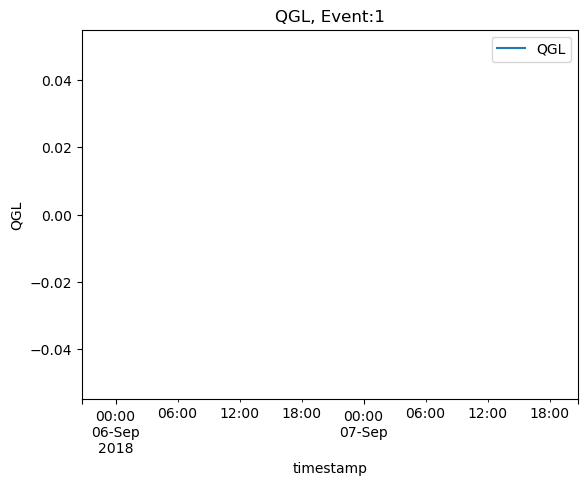

In [41]:
event = 1

# for variable in testdata.columns[1:9]:
for variable in testdata.columns[1:9]:
    plot = testdata.plot(x='timestamp', y=variable)
    plot.set_ylabel(variable)
    plot.set_title(variable + ", Event:1")
    plot.fill_between(testdata['timestamp'].to_numpy(), min(testdata[variable]), max(testdata[variable]), where=(testdata['class']==0), color='green', alpha = 0.3)
    plot.fill_between(testdata['timestamp'].to_numpy(), min(testdata[variable]), max(testdata[variable]), where=(testdata['class']==event), color='red', alpha = 0.3)
    plot.fill_between(testdata['timestamp'].to_numpy(), min(testdata[variable]), max(testdata[variable]), where=(testdata['class']==event+100), color='yellow', alpha = 0.3)
    # # plot.savefig(Event num. + Filename + Variable.png)
    # fig = plot.get_figure()
    # fig.savefig('test.png') # Can assign directory to save figures.


['WELL-00001_20170201020207.csv', 'WELL-00001_20170201070114.csv', 'WELL-00001_20170201120124.csv', 'WELL-00001_20170201170311.csv', 'WELL-00001_20170201220228.csv', 'WELL-00001_20170202030343.csv', 'WELL-00001_20170202080239.csv', 'WELL-00001_20170218010146.csv', 'WELL-00001_20170218060218.csv', 'WELL-00001_20170218110218.csv', 'WELL-00001_20170218160135.csv', 'WELL-00001_20170218210311.csv', 'WELL-00001_20170219020042.csv', 'WELL-00001_20170219070031.csv', 'WELL-00001_20170219120021.csv', 'WELL-00001_20170219170053.csv', 'WELL-00001_20170219220332.csv', 'WELL-00001_20170421100251.csv', 'WELL-00001_20170422040000.csv', 'WELL-00001_20170424180042.csv', 'WELL-00001_20170424230156.csv', 'WELL-00001_20170425040207.csv', 'WELL-00001_20170425090343.csv', 'WELL-00001_20170425140042.csv', 'WELL-00001_20170520190000.csv', 'WELL-00001_20170521000000.csv', 'WELL-00001_20170521050000.csv', 'WELL-00001_20170521100000.csv', 'WELL-00001_20170521150000.csv', 'WELL-00001_20170521200000.csv', 'WELL-000

'D:\\KIGAM_Hackathon\\dataset\\data\\0'